# Intro

## Links

https://canvas.northwestern.edu/courses/167719/assignments/1078603?module_item_id=2319248 

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction


## Modules

In [1]:
#For data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import array 
from numpy import arange 

#For Isolation Forest from sklearn
from sklearn.ensemble import IsolationForest
from enum import auto

#From sklearn (SVM, Logistic, Bayes)
from sklearn.svm import SVC
from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import mean_squared_error

#Other
from math import sqrt

## Import Files

In [2]:
#Import data.csv from the Kaggle page linked above
# from google.colab import files
# uploaded = files.upload()

In [3]:
df = pd.read_csv("data.csv")

# EDA

## Intro Stats

In [4]:
df.shape

(6819, 96)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
# check for missing values
print(df.isna().sum().sum())
print(np.isnan(df).sum().sum())
print(df.isnull().sum().sum())

0
0
0


In [7]:
df.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [8]:
# create a for loop to get the categorical columns with 2 or less than 2 unique values
list_1=[]
for i in df.columns:
  x=df[i].value_counts()
  if len(x)<=2:
    list_1.append(i)
  else:
    continue

In [9]:
# categorical variables (value_counts <= 2 )
list_1

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

### Checking [Bankrupt?]

In [10]:
df['Bankrupt?'].unique()

array([1, 0], dtype=int64)

In [11]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

<AxesSubplot:xlabel='Bankrupt?', ylabel='Count'>

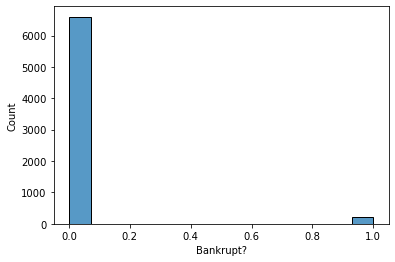

In [12]:
sns.histplot(x="Bankrupt?", data=df)

### Checking [Net Income Flag]

In [13]:
df[' Net Income Flag'].unique()

array([1], dtype=int64)

In [14]:
df[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

Every value is a 1 for this feature, so we can drop this column since it doesn't provide us any predictive value.

### Checking [ Liability-Assets Flag]

In [15]:
df[' Liability-Assets Flag'].unique()

array([0, 1], dtype=int64)

In [16]:
df[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

This feature may not provide good predictive value to the model since it has a large imbalance between the 0 and 1 classes. Therefore, we can also drop this column.

## Feature Selection

In [17]:
y = df['Bankrupt?']

In [18]:
X = df.drop(columns = ['Bankrupt?',' Liability-Assets Flag',' Net Income Flag'])

In [19]:
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [20]:
cor_matrix = X.corr().abs()
cor_matrix

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
ROA(C) before interest and depreciation before interest,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,...,0.160725,0.887670,0.071725,0.008135,0.334721,0.274287,0.143629,0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,...,0.195673,0.961552,0.098900,0.011463,0.326971,0.291744,0.141039,0.011515,0.013372,0.057887
ROA(B) before interest and depreciation after tax,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,...,0.162572,0.912040,0.089088,0.007523,0.333750,0.280617,0.142838,0.014663,0.011473,0.056430
Operating Gross Margin,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,0.029430,...,0.132650,0.300143,0.022672,0.004205,1.000000,0.075304,0.085434,0.011806,0.001167,0.120029
Realized Sales Gross Margin,0.332755,0.324956,0.331755,0.999518,1.000000,0.005610,0.032232,0.026851,0.051242,0.029166,...,0.132607,0.298155,0.022750,0.004038,0.999518,0.074891,0.085407,0.011268,0.001158,0.120196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,0.274287,0.291744,0.280617,0.075304,0.074891,0.006216,0.011343,0.010648,0.007693,0.011191,...,0.070354,0.328492,0.040217,0.000127,0.075303,1.000000,0.791836,0.000093,0.005147,0.029622
Liability to Equity,0.143629,0.141039,0.142838,0.085434,0.085407,0.001541,0.004043,0.004390,0.011899,0.002996,...,0.132372,0.159697,0.021982,0.003724,0.085434,0.791836,1.000000,0.002119,0.001487,0.159654
Degree of Financial Leverage (DFL),0.016575,0.011515,0.014663,0.011806,0.011268,0.000935,0.000855,0.000927,0.000556,0.000774,...,0.022033,0.010463,0.001881,0.008812,0.011806,0.000093,0.002119,1.000000,0.016513,0.016739
Interest Coverage Ratio (Interest expense to EBIT),0.010573,0.013372,0.011473,0.001167,0.001158,0.000393,0.000984,0.000957,0.001024,0.000798,...,0.007652,0.012746,0.000239,0.001027,0.001169,0.005147,0.001487,0.016513,1.000000,0.008339


From the correlation matrix, tt appears that there are feature variables that are highly correlated with one another. We will remove these features from the data set before perform any feature selection

In [21]:
# create function that calculates VIF and drops any columns that have a VIF greater than 5
from numpy.core.fromnumeric import shape
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(x):
  thresh = 5
  output = pd.DataFrame()
  k= x.shape[1]
  vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
  for i in range(1, k):
    print('Iteration no ', i)
    print(vif)
    a = np.argmax(vif)
    print ('Max vif is for variable no : ',a)
    if(vif[a]<=thresh):
      break
    if(i==1):
      output = x.drop(x.columns[a], axis = 1)
      vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    elif(i>1):
      output = output.drop(output.columns[a], axis = 1)
      vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
  return(output)

In [22]:
# select non-correlated features
select_features = cal_vif(X)

Iteration no  1
[69.01850223325629, 43.595467498059946, 102.89448309616877, 63784107.00172185, 1076.2927070171597, 82724488.6699668, 31113694.835407037, 1822.4631663986613, 11440456.186908506, 337.99634964330147, 1.2612409105505844, 1.092355471002177, 7.558642941248357, 1.0416010164740737, 1.3274514511808797, 782.0303535509482, 3911.8118072742327, 3126.1592381455343, 32.038789339109286, 4.187190702735464, 4.360882460291321, 637.9946060235118, 21.713722438768315, 1.0395640475297192, 1.9329780110347787, 133.49730672423615, 132.68280523255828, 1.023089394986167, 1.1253183182354223, 1.1245861424549934, 1.826570517281875, 3.6480610538571487, 1.3580387765690056, 1.0598223919041465, 1.0089769111560956, 1.5570356618276393, 2537479393.75135, 1151884255.8721192, 1.4719169862979808, 37.479577314825995, 9.119084282253652, 638.7817489939426, 30.099870538396818, 36.079332620209954, 5.900687445057002, 1.568334527356616, 1.3076566055626773, 1.1411513437741085, 1.3401406515691616, 6.3814957656262425, 3

Iteration no  6
[69.01843867910554, 43.59545155672999, 102.8944102797821, 1076.2428663838002, 341.8676600541442, 2099.5112510482295, 1822.432122978828, 89.10801894192626, 337.99679759847317, 1.261241136214421, 1.0923559147560635, 7.558636455709332, 1.0416009967834616, 1.3274513605677942, 782.0324549132838, 3911.821395485279, 3126.1843379482093, 32.03876085247057, 4.1871928234659395, 4.3608694560476255, 637.9944893905695, 21.713698273370486, 1.0395640239409107, 1.9329782325964255, 133.4973699620581, 132.68280169131896, 1.0230893939094639, 1.1253170607912437, 1.1245860240422372, 1.8265711137156035, 3.648059398345722, 1.3580381762903415, 1.0598228725557348, 1.0089769775690551, 1.55703726894736, 27.900060153775666, 1.4719165524901863, 37.479578523191776, 9.119082640748614, 638.781778152115, 30.09986594671374, 36.07910227807162, 5.900690100875294, 1.5683337255431786, 1.307657423274896, 1.1411508012554488, 1.3401415388440343, 6.381495643813511, 3.3371155156563144, 1.5984657131466147, 1.15168

Iteration no  11
[68.0671708751222, 3161.0145433695734, 100.9290350607289, 3134.1205350917417, 111.1680929406005, 320.03445542007415, 20.34226382816748, 323.4744145844528, 1.2603266015382024, 1.0919620955193658, 7.439186231811552, 1.062958577726563, 2.239648037447612, 21033.558655599234, 20972.427304388315, 30.2750771901795, 4.185602249253705, 3.4403365179270575, 6.579015980033503, 688.1931398669997, 4.617288581547319, 11660.246326760267, 133.48744297995515, 132.681410242651, 1.0230428993045766, 1.123123223924885, 1.1245428860119775, 1065.7758417024213, 1225.8275681857187, 1.356704982059388, 1.0574095975908262, 1.0080921076124225, 1.5432730696634762, 27.823042855627733, 1.609942952988234, 37.41550995194915, 9.102402813200193, 965.3561427332245, 34.601585980078525, 5.8757578359138956, 1.566553554302068, 1.3094285581886307, 1.1394255184317164, 1.3399060103854485, 13.42526454430752, 3.0388048787404407, 240.77103544305453, 1.1527582067970257, 1301.841159834393, 23.89348018501388, 5.5757973

Iteration no  17
[66.34315772274273, 1746.3189538023519, 99.70082832873351, 2.327818258843756, 48.6104106489278, 249.2728301975468, 11.95362810421759, 320.10218839520394, 1.2450899767363937, 1.083551196502853, 7.323086598723832, 1.0586499037919503, 2.219002665070272, 109.00183330609636, 30.139124522841804, 3.981383385647353, 3.3930101713073597, 6.502490337002233, 21.44410789130667, 1.037652268505332, 132.68950534397592, 132.6422172739279, 1.0216367763751104, 1.0900079558581237, 1.0996564186832292, 972.9903832230781, 3.3801411585288634, 1.3530378522329058, 1.0569497060279374, 1.007554283585057, 1.5352173175527157, 25.55657503075211, 1.6076008870547194, 2.4372599293000636, 26.473328832245823, 5.496256888244357, 1.491174088253438, 1.3062695364113381, 1.1389037590925732, 1.3379586417670575, 5.082916017424193, 3.000916140270502, 240.61609425983016, 1.1518616324162196, 1009.5311260668692, 20.665847904155374, 4.970925262533904, 1.1905416252572583, 1.0604394710866707, 30.4575933592071, 8.51100

Iteration no  23
[376.3260055548305, 2.273529307302779, 47.02189187343344, 244.1375943838455, 11.740695597888568, 316.05125965444694, 1.2401994770143343, 1.0673968245334338, 7.2656522981412, 1.033008673550566, 1.136161641651308, 88.2489794381257, 3.3764907116549567, 3.369709214170665, 5.7728264069476305, 16.441706342478874, 1.0347775689281293, 132.57048906444942, 132.5550980525664, 1.0209151004697201, 5.020751362321105, 1.0765666735835113, 3.280514436796686, 1.299234798908615, 1.05177388398743, 1.0064980015007834, 1.522302657014947, 25.10203325816277, 1.463839341314538, 2.410843716812431, 18.299494118882915, 5.39959618790192, 1.4828182276566624, 1.3054100001111935, 1.1060868283265828, 1.2641340232913296, 5.055791269739354, 2.977146571374702, 1.4836181913141948, 1.1496580080646486, 3.177233846815602, 2.6960555454470043, 1.170127756470496, 1.052811990248258, 28.862098831964634, 8.4395142125928, 1.080151837202097, 1.069297375593684, 1.0231270383537474, 2.9800580460543293, 1.33762057549150

Iteration no  29
[328.4165823617992, 157.95332380103432, 4.775121259647156, 143.7859648108836, 1.221996737856198, 1.0616365714079012, 5.541415755688212, 1.0557104862049358, 1.898215329615006, 86.9004470750717, 2.4982449352156557, 5.611244070921026, 16.359089142166475, 4.537569384525504, 132.4826233489204, 132.53853472230514, 1.0173427414372147, 5.010540428222744, 1.0553430729965783, 2.8373532710026317, 1.2788334090940396, 1.051184858747885, 0.9577155475216537, 1.4402683030943213, 1.6045371838632192, 1.4374439653456261, 18.07148084019496, 4.728883866420751, 1.4462320215294087, 1.303075769757576, 1.1042480289387941, 1.464393070164039, 4.222803854781857, 2.4549967338683234, 216.63376917892853, 1.1509442297249703, 15.385535960552208, 4.793959437168132, 1.1139652752636107, 1.0575305237254826, 16.328583528452125, 7.368121306718486, 1.0631711663690555, 1.0713235636330598, 1.0314943252318987, 2.739393392114565, 1.3926919038088112, 4.571072721182908, 1.479301601235644, 1.4241963800315933, 23.60

Iteration no  36
[141.08553789997785, 4.611204797784756, 128.46050841322958, 1.2195380268908855, 1.0590835222598263, 1.055373440106775, 1.8942554116574302, 81.55413340201608, 2.3617678451720283, 74.14905271433172, 177.97869312933307, 4.536205509595707, 132.4504487801231, 132.52575869002283, 4.972906213047227, 1.0529702515582486, 2.7172012053183434, 1.2775470002463718, 1.0507634153093033, 0.9523481174618491, 1.2963865330478255, 1.6002744569588208, 1.3287183946269572, 4.417506435984275, 1.3670316368045623, 1.3022588137036217, 1.1031240944547744, 1.4531653612243154, 3.93201157688317, 2.291259436348037, 210.26159864210632, 1.1509023431841925, 15.32911179541859, 4.782695060366597, 1.1091453610406912, 1.0570370255664794, 15.806785530849307, 2.9103225790770937, 1.0693395818025933, 1.025474620386796, 2.398362475990057, 1.3913247631555477, 4.4174623371448805, 1.4713976715442254, 1.4227965806940253, 22.63360587474992, 1.1409501234845627, 21.641658532845906, 1.211183064482529, 32.4852401432528, 2

Iteration no  44
[1.1468768878622662, 0.8815779693474786, 1.202603034159136, 1.0516847303565569, 1.0478795387703677, 1.8839317710289856, 1.3754626173376434, 23.675604977071544, 4.534133573141216, 0.9192797488392095, 1.0550840875143477, 1.051178888741455, 2.679793193799081, 1.2569070830512976, 1.0419771487586404, 0.8640175402345628, 1.2883837269935468, 1.5307037220394715, 1.3257034160893029, 4.382834738274568, 1.1943584570985937, 1.2921667544592716, 1.0905588791752023, 1.442859636715871, 3.854631712418256, 1.2054796595947481, 1.1461969598861548, 14.940119239360286, 3.9442976992287204, 1.1033341045363014, 1.0544630554712264, 14.823915430077134, 2.862776081373064, 1.0632992068014975, 1.0201381636527143, 2.134686385768237, 1.3721204932058, 1.8527786615606778, 1.4687989699790276, 1.419664356047946, 1.1386615675276917, 1.1984157650026799, 31.746745423597293, 2.157534814589375, 5.015642633266676, 4.3882288370794695, 1.057051599937959, 1.4439306370430585, 4.101549257900018, 4.788827285972028]


In [23]:
select_features.head()

,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,After-tax Net Profit Growth Rate,Total Asset Growth Rate,...,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Current Liability to Current Assets,Total assets to GNP price,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Equity to Liability
0,0.302646,0.780985,1.256969e-04,0.0,0.000725,0.0,0.017560,0.022102,0.688979,4.980000e+09,...,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.126549,0.118250,0.009219,0.827890,0.026601,0.016469
1,0.303556,0.781506,2.897851e-04,0.0,0.000647,0.0,0.021144,0.022080,0.689693,6.110000e+09,...,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.120916,0.047775,0.008323,0.839969,0.264577,0.020794
2,0.302035,0.780284,2.361297e-04,25500000.0,0.000790,0.0,0.005944,0.022760,0.689463,7.280000e+09,...,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.117922,0.025346,0.040003,0.836774,0.026555,0.016474
3,0.303350,0.781241,1.078888e-04,0.0,0.000449,0.0,0.014368,0.022046,0.689110,4.880000e+09,...,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.120760,0.067250,0.003252,0.834697,0.026697,0.023982
4,0.303475,0.781550,7.890000e+09,0.0,0.000686,0.0,0.029690,0.022096,0.689697,5.510000e+09,...,6.680000e+09,5.050000e+09,8.240000e+08,0.309555,0.110933,0.047725,0.003878,0.839973,0.024752,0.035490


In [24]:
X = select_features

In [25]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, chi2

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(6819, 10)


In [26]:
# create filter mask to identify feature names
filter = fs.get_support()
features = array(X.columns)
print(features[filter])

[' Tax rate (A)' ' Fixed Assets Turnover Frequency' ' Cash/Total Assets'
 ' Cash/Current Liability' ' Retained Earnings to Total Assets'
 ' Total expense/Assets' ' Equity to Long-term Liability'
 ' Current Liability to Current Assets'
 " Net Income to Stockholder's Equity" ' Equity to Liability']


In [27]:
# create list of columns to drop from df
columns_to_remove = X.columns.values[np.logical_not(filter)]
columns_to_remove

array([' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate',
       ' Interest-bearing debt interest rate',
       ' Revenue Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' After-tax Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Current Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Long-term fund suitability ratio (A)',
       ' Contingent liabilities/Net worth', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Revenue per person',
       ' Allocation rate per person', ' Quick Assets/Current Liability',
       ' Inventory/Current Liability',
       ' Long-term Liability to Current Assets',
       ' Total income/Total expense', ' Current Asset Turnover Rate',

In [28]:
# remove features from  data
df1 = X.drop(columns=columns_to_remove)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0    Tax rate (A)                         6819 non-null   float64
 1    Fixed Assets Turnover Frequency      6819 non-null   float64
 2    Cash/Total Assets                    6819 non-null   float64
 3    Cash/Current Liability               6819 non-null   float64
 4    Retained Earnings to Total Assets    6819 non-null   float64
 5    Total expense/Assets                 6819 non-null   float64
 6    Equity to Long-term Liability        6819 non-null   float64
 7    Current Liability to Current Assets  6819 non-null   float64
 8    Net Income to Stockholder's Equity   6819 non-null   float64
 9    Equity to Liability                  6819 non-null   float64
dtypes: float64(10)
memory usage: 532.9 KB


## Removing Anomalies with Isolation Forests

In [29]:
df2 = df1

In [30]:
#Isolation Forest Identifies anomalies
model=IsolationForest(n_estimators=100, contamination=float(.05), random_state=42)

model.fit(df1)

C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [31]:
df2['scores'] = model.decision_function(df1)
df1 = X.drop(columns=columns_to_remove)


In [32]:
#Removing anomolies from the dataset

df2['anomaly_score'] = model.predict(df1)

df3 = pd.concat([y, df2], axis=1)

df4 = df3[df3['anomaly_score']!=-1]

df5 = df4.drop(columns = ['scores', 'anomaly_score'])
df5.head(10)

,Bankrupt?,Tax rate (A),Fixed Assets Turnover Frequency,Cash/Total Assets,Cash/Current Liability,Retained Earnings to Total Assets,Total expense/Assets,Equity to Long-term Liability,Current Liability to Current Assets,Net Income to Stockholder's Equity,Equity to Liability
0,1,0.000000,1.165007e-04,0.004094,0.000147,0.903225,0.064856,0.126549,0.118250,0.827890,0.016469
1,1,0.000000,7.190000e+08,0.014948,0.001384,0.931065,0.025516,0.120916,0.047775,0.839969,0.020794
3,1,0.000000,9.150000e+09,0.018851,0.001011,0.906902,0.024161,0.120760,0.067250,0.834697,0.023982
4,1,0.000000,2.935211e-04,0.014161,0.000680,0.913850,0.026385,0.110933,0.047725,0.839973,0.035490
6,0,0.000000,1.452476e-04,0.022989,0.001050,0.911441,0.092802,0.120561,0.060765,0.829980,0.015663
7,0,0.157607,5.182010e-04,0.014616,0.000888,0.935449,0.025482,0.114508,0.030201,0.841459,0.034889
8,0,0.005871,2.458618e-04,0.145189,0.013190,0.935200,0.029884,0.110933,0.021710,0.840487,0.065826
9,0,0.392449,7.383418e-04,0.008773,0.000491,0.938290,0.035891,0.115499,0.025494,0.840688,0.030801
10,0,0.000000,1.747510e-04,0.002057,0.000336,0.942829,0.028802,0.120943,0.047166,0.841337,0.036572
11,0,0.000000,1.066662e-04,0.020542,0.002254,0.932955,0.056952,0.116459,0.033712,0.840650,0.040381


In [33]:
X = df5.drop(columns=['Bankrupt?'], axis=1)
X.shape
y = df5['Bankrupt?']

## Data Prep

### Split the Data for Training

In [34]:
X = df5.drop(columns=['Bankrupt?'], axis=1)
X.shape

(6478, 10)

In [35]:
y = df5['Bankrupt?']

In [36]:
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale the Data

In [37]:
# use StandardScaler to scale features
scaler = StandardScaler()

#scale the training data
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
# scale test data for model testing
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

### SMOTE for Training Data

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# Models

## Support Vector Machine (SVM)

In [40]:
# # SVM Classifier model
svm_clf = SVC(kernel="rbf", C=1, probability=True)
svm_clf.fit(X_train, y_train)
svm_model = svm_clf.fit(X_train, y_train)

In [41]:
# kfold cross validation
score = cross_val_score(svm_model, X_train, y_train, cv=10, verbose=3)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.902) total time=   7.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV] END ................................ score: (test=0.873) total time=   7.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.7s remaining:    0.0s


[CV] END ................................ score: (test=0.897) total time=   8.4s
[CV] END ................................ score: (test=0.906) total time=   7.6s
[CV] END ................................ score: (test=0.892) total time=   7.3s
[CV] END ................................ score: (test=0.897) total time=   7.2s
[CV] END ................................ score: (test=0.898) total time=   6.7s
[CV] END ................................ score: (test=0.897) total time=   6.7s
[CV] END ................................ score: (test=0.910) total time=   6.9s
[CV] END ................................ score: (test=0.894) total time=   6.7s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished


0.8966787276715028

In [42]:
# predictions
y_pred = svm_model.predict(X_test)

In [43]:
# precision and recall scores
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 15.18%
Recall: 82.86%


In [44]:
# f1 score
f1_score(y_test, y_pred)

0.2566371681415929

### Tuning SVM Model Hyperparameters

In [45]:
# create grid search cross validation to tunr hyperparmeters of SVC model
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

grid = GridSearchCV(SVC(probability=True, kernel='rbf'),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   9.7s
[CV] END .....................................C=0.1, gamma=1; total time=   9.7s
[CV] END .....................................C=0.1, gamma=1; total time=   9.7s
[CV] END .....................................C=0.1, gamma=1; total time=   9.9s
[CV] END .....................................C=0.1, gamma=1; total time=  11.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   7.8s
[CV] END ...................................C=0.1, gamma=0.1; total time=   9.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   8.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   7.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   7.8s
[CV] END ..................................C=0.1, gamma=0.01; total time=   9.0s
[CV] END ..................................C=0.1

In [46]:
# print optimal values for C and gamma
print(grid.best_estimator_)

SVC(C=10, gamma=1, probability=True)


In [47]:
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)
y_score = grid.decision_function(X_test)

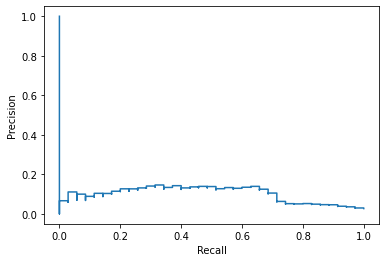

In [48]:
#Precision/Recall 
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=grid.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

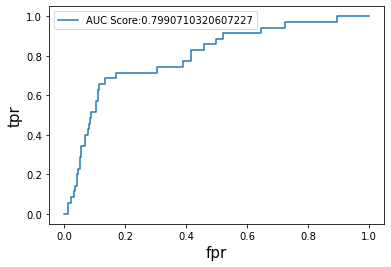

In [49]:
#Plot the ROC curve
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')

In [50]:
cnf_matrix = confusion_matrix(y_test,y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

results = pd.DataFrame(columns = ['Model', 'TPR', 'FPR', 'precision', 'recall', 'accuracy', 'f1-value'])

#eval
Model = 'SVM' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,SVM,"[0.97, 0.09]","[0.91, 0.03]","[0.97, 0.08]","[0.97, 0.09]","[0.95, 0.95]",0.08


## Logistic Regression Model

In [51]:
# create logistic model
log_clf = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')

log_model = log_clf.fit(X_train, y_train)

In [52]:
# kfold validation
score = cross_val_score(log_clf, X_train, y_train, cv=3, verbose=3)
score.mean()

[CV] END ................................ score: (test=0.850) total time=   0.0s
[CV] END ................................ score: (test=0.845) total time=   0.0s
[CV] END ................................ score: (test=0.855) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.8501087474292569

In [53]:
y_pred = log_model.predict(X_test)
y_pred_proba = log_clf.predict_proba(X_test)
y_score = log_clf.decision_function(X_test)

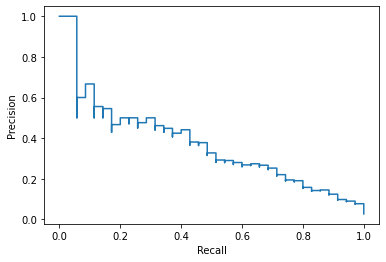

In [54]:
#Precision/Recall 
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=log_clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

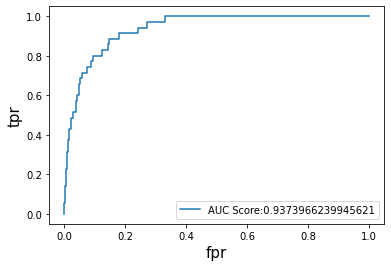

In [55]:
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')

In [56]:
cnf_matrix = confusion_matrix(y_test,y_pred)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'Logistic Regression' 
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,SVM,"[0.97, 0.09]","[0.91, 0.03]","[0.97, 0.08]","[0.97, 0.09]","[0.95, 0.95]",0.08
1,Logistic Regression,"[0.83, 0.89]","[0.11, 0.17]","[1.0, 0.13]","[0.83, 0.89]","[0.83, 0.83]",0.22


## Naïve Bayes model

In [57]:
 # create naive bayes model
 nb_clf = GaussianNB()
 nb_model = nb_clf.fit(X_train, np.ravel(y_train))

In [58]:
# kfold cross validation
score = cross_val_score(nb_clf, X_train, y_train, cv=3, verbose=3)
score.mean()

[CV] END ................................ score: (test=0.832) total time=   0.0s
[CV] END ................................ score: (test=0.821) total time=   0.0s
[CV] END ................................ score: (test=0.842) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.8315206611318201

In [59]:
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_clf.predict_proba(X_test)

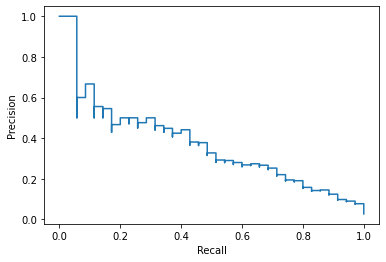

In [60]:
#Precision/Recall 
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=nb_clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

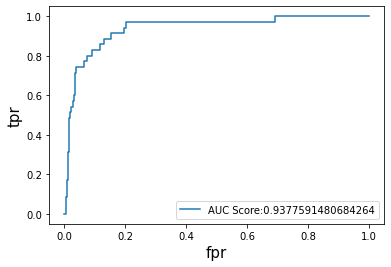

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')

In [62]:
cnf_matrix = confusion_matrix(y_test,y_pred)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#eval
Model = 'naive bayes'
TPR = [round(num, 2) for num in TPR]
FPR = [round(num, 2) for num in FPR]
precision = [round(num, 2) for num in PPV]
recall = [round(num, 2) for num in TPR]
accuracy = [round(num, 2) for num in ACC]
f1_value = round(f1_score(y_pred, y_test),2)
row3 = [Model, TPR, FPR, precision, recall, accuracy, f1_value]
results = results.append(pd.DataFrame([row3], columns=results.columns), ignore_index=True)
results

,Model,TPR,FPR,precision,recall,accuracy,f1-value
0,SVM,"[0.97, 0.09]","[0.91, 0.03]","[0.97, 0.08]","[0.97, 0.09]","[0.95, 0.95]",0.08
1,Logistic Regression,"[0.83, 0.89]","[0.11, 0.17]","[1.0, 0.13]","[0.83, 0.89]","[0.83, 0.83]",0.22
2,naive bayes,"[0.87, 0.86]","[0.14, 0.13]","[1.0, 0.16]","[0.87, 0.86]","[0.87, 0.87]",0.27
